<a href="https://colab.research.google.com/github/ykitaguchi77/GravCont_classification_2/blob/main/ZoeDepth_202504.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ZoeDepth**

In [1]:
# ✅ 1. Google Drive をマウント
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
# ✅ 2. 必要なライブラリと ZoeDepth をインストール
!git clone https://github.com/isl-org/ZoeDepth.git
%cd ZoeDepth

# ✅ 3. ライブラリをインストール（timmはバージョン指定）
!pip install torch torchvision timm==0.6.7 omegaconf matplotlib opencv-python


Cloning into 'ZoeDepth'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (69/69), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 111 (delta 38), reused 23 (delta 23), pack-reused 42 (from 2)
Receiving objects: 100% (111/111), 4.09 MiB | 10.61 MiB/s, done.
Resolving deltas: 100% (39/39), done.
/content/ZoeDepth
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 4.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 86.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 38.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [3]:
# ✅ 4. sys.path に ZoeDepth を追加（←これが import エラーの原因です！）
import sys
sys.path.append("/content/ZoeDepth")


In [9]:
# ✅ 5. ZoeDepth モデル構築と推論（NK構成で統一）
import torch
import os
import torchvision.transforms as T
from PIL import Image
import matplotlib.pyplot as plt
from zoedepth.utils.config import get_config
from zoedepth.models.builder import build_model
from zoedepth.utils.misc import colorize

os.chdir("/content/ZoeDepth")
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

# 構成を明示的に nk に
conf = get_config("zoedepth_nk", "infer")
model = build_model(conf)
model.to(DEVICE).eval()

# 重みロード（nk対応のもの）
import torch

# ZoeDepth NK モデルを Torch Hub からロード
model_zoe_nk = torch.hub.load("isl-org/ZoeDepth", "ZoeD_NK", pretrained=True)

img_size [384, 512]


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_NK.pt
Loaded successfully


Using cache found in /root/.cache/torch/hub/isl-org_ZoeDepth_main


img_size [384, 512]


Using cache found in /root/.cache/torch/hub/intel-isl_MiDaS_master


Params passed to Resize transform:
	width:  512
	height:  384
	resize_target:  True
	keep_aspect_ratio:  True
	ensure_multiple_of:  32
	resize_method:  minimal
Using pretrained resource url::https://github.com/isl-org/ZoeDepth/releases/download/v1.0/ZoeD_M12_NK.pt
Loaded successfully


In [16]:
# ✅ 6. 画像のパスを設定（Google Drive の画像）
input_img_path = "/content/drive/MyDrive/Deep_learning/Eyelid_segmentation/Segmentation_cropped_images/Control_adult/images/1012_L.png"  # 任意の画像に置き換えてください
output_depth_path = "/content/ZoeDepth/output_depth.png"


In [17]:
# ✅ 7. 画像読み込みと推論
img = Image.open(input_img_path).convert("RGB")
transform = T.Compose([T.Resize((384, 512)), T.ToTensor()])
img_tensor = transform(img).unsqueeze(0).to(DEVICE)

with torch.no_grad():
    depth = model_zoe_nk.infer(img_tensor)[0]
depth = depth.cpu().numpy()

# カラーマップ付きで保存
depth_viz = colorize(depth)
Image.fromarray(depth_viz).save(output_depth_path)


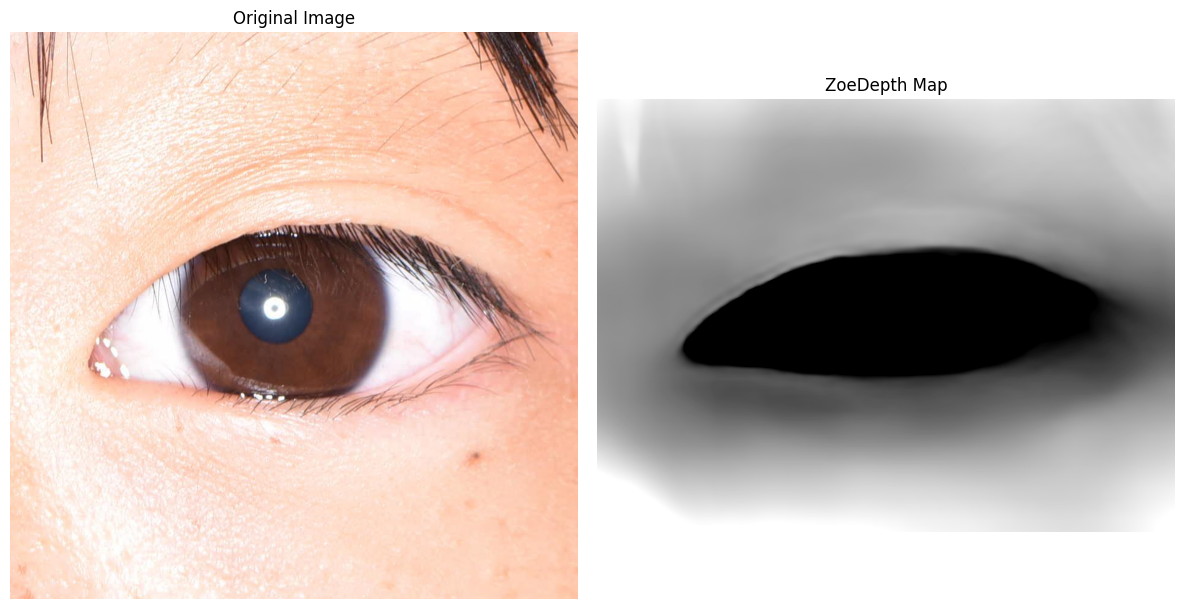

In [18]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Depthマップの表示用画像（NumPy配列形式に変換）
depth_viz_np = np.array(depth_viz)

# 並べて表示
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# 元画像表示
ax[0].imshow(img)
ax[0].set_title("Original Image")
ax[0].axis("off")

# Depthマップ表示
ax[1].imshow(depth_viz_np)
ax[1].set_title("ZoeDepth Map")
ax[1].axis("off")

plt.tight_layout()
plt.show()
